# Title: Study the effect of Breadth and Depth of Neural networks while controlling the optimizers, activattion functions and loss functions in an ANN for doing regression prediction on a given dataset.

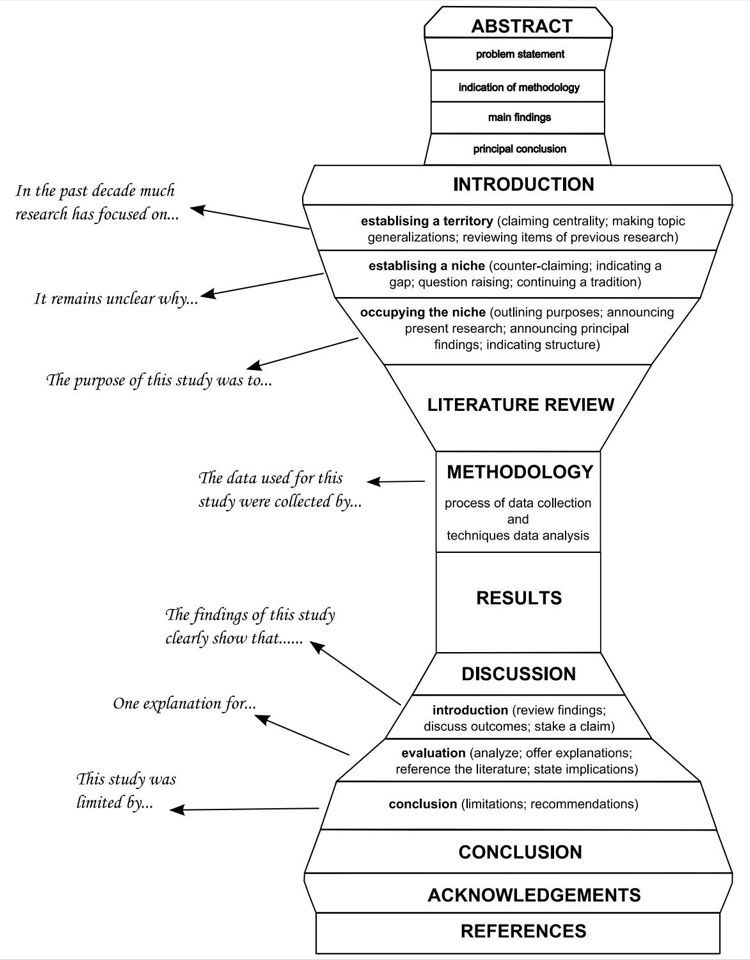

# Abstract

## Problem Statement



In the field of deep learning, the architecture of deep neural networks is paramount to their performance on various tasks. Specifically, the choice between the depth (number of layers) and breadth (number of units in a layer) of a network presents a critical decision in the network design. While both depth and breadth have their advantages and disadvantages, there is no clear-cut guideline on when to prefer one over the other.

The problem to be studied, therefore, is the comparative analysis of breadth vs. depth in deep neural networks. The objective is to understand under what circumstances one is preferred over the other. This includes investigating how different tasks, data sizes, and complexities may favor a deeper network or a broader one.

The approach will involve:
- Analyzing various deep neural network architectures and their performance on diverse datasets and tasks.
- Experimenting with different levels of depth and breadth, holding other factors constant, to observe the effects on performance, training stability, and generalization.
- Investigating real-world applications where a specific choice between depth and breadth has led to significant improvements.
- Identifying theoretical principles or empirical rules that may guide the selection between depth and breadth in various scenarios.

The expected outcome of this study will provide insights and possibly a framework to assist practitioners in making informed decisions about the depth and breadth of deep neural networks based on the specific requirements of their tasks and data. This could lead to more efficient training, better utilization of resources, and ultimately, enhanced performance of deep learning models.


The efficacy of depth vs. breadth in deep neural networks is a complex subject and can vary depending on the specific task, architecture, and data. Here's a brief overview:

1. **Depth** (number of layers):
   - **Advantages**: Adding more layers generally allows the network to learn more complex and abstract representations of the data. Deep networks have proven highly effective in many applications, particularly image recognition.
   - **Disadvantages**: Increased risk of overfitting, especially with smaller datasets. Deeper networks also require more computational resources and are often more challenging to train, with issues like vanishing or exploding gradients.

2. **Breadth** (number of units in a layer):
   - **Advantages**: Increasing the number of units in a layer can enable the network to learn more features and have more expressive power.
   - **Disadvantages**: Similar to depth, increased breadth can lead to overfitting and greater computational expense. There may be diminishing returns after a certain point, where adding more units doesn't improve performance significantly.

**Balance between Depth and Breadth**:
Finding the right balance between depth and breadth is often empirical, depending on the specific problem, dataset, and other factors like regularization and architecture design (e.g., residual connections). In general, increasing depth seems to have a more transformative impact on the learning capacity of the network, whereas breadth can help to a point but may have diminishing returns.

Recent advancements like transformer models and other deep architectures show a preference for depth, with careful design to mitigate training challenges. Experimentation and validation on the specific task are typically the best ways to find an optimal configuration.

## Datasets that were used in the test

Certainly! Here's a brief description of each of the datasets:

1. **Diabetes**: This dataset is used to predict a quantitative measure of disease progression one year after baseline. It contains ten baseline variables like age, sex, body mass index, average blood pressure, and six blood serum measurements for 442 diabetes patients.

2. **California Housing**: The California housing data contains the California census data, which has metrics such as the population, median income, median housing price, and so on for each block group in California.

3. **Wine Quality (Red)**: This dataset is related to the red variant of the Portuguese "Vinho Verde" wine. It contains 11 physicochemical attributes and the quality as judged by wine experts.

4. **Wine Quality (White)**: Similar to the red wine dataset, this one pertains to the white variant of Portuguese "Vinho Verde" wine. It includes the same features as the red wine dataset.

5. **Concrete Compressive Strength**: This dataset includes 1,030 instances with 8 input attributes and 1 output attribute. The goal is to predict the concrete compressive strength based on factors like cement, blast furnace slag, fly ash, water, etc.

6. **Auto MPG**: The dataset contains fuel consumption data as measured in miles per gallon (MPG) for different makes and models of cars, along with attributes like cylinders, displacement, horsepower, weight, and acceleration.

7. **Forest Fires**: This dataset is used to predict the burned area of forest fires in the northeast region of Portugal. Inputs include weather data and other environmental indices.

8. **Airfoil Self-Noise**: The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The goal is to predict the scaled sound pressure level.

9. **Abalone**: This dataset is used to predict the age of abalones from physical measurements. The age of abalones is determined by cutting the shell and counting the number of rings inside.

10. **Yacht Hydrodynamics**: This dataset is used to predict the residuary resistance of sailing yachts from the results of towing tank experiments. Inputs include attributes like the length, draft, beam, length-beam ratio, etc.



# Methodology

## Download the dataset

In [1]:
from sklearn.datasets import load_diabetes, fetch_california_housing
import pandas as pd

# Diabetes Dataset (target is the target variable)
diabetes = load_diabetes()
diabetes_target = diabetes.target

# California Housing Dataset (target is the target variable)
california_housing = fetch_california_housing()
california_housing_target = california_housing.target

# Wine Quality Dataset (Red Wine) - Predicting "quality"
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_quality_red = pd.read_csv(wine_url, sep=";")
wine_quality_red_target = wine_quality_red['quality']

# Wine Quality Dataset (White Wine) - Predicting "quality"
wine_url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_quality_white = pd.read_csv(wine_url_white, sep=";")
wine_quality_white_target = wine_quality_white['quality']

# Concrete Compressive Strength Dataset - Predicting "Concrete compressive strength(MPa)"
concrete_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
concrete_data = pd.read_excel(concrete_url)
concrete_target = concrete_data['Concrete compressive strength(MPa, megapascals) ']

# Auto MPG Dataset - Predicting MPG (miles per gallon)
auto_mpg_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
auto_mpg = pd.read_csv(auto_mpg_url, delim_whitespace=True, header=None)
auto_mpg_target = auto_mpg[0]

# Forest Fires Dataset - Predicting "area" of forest fires
forest_fires_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
forest_fires = pd.read_csv(forest_fires_url)
forest_fires_target = forest_fires['area']

# Airfoil Self-Noise Dataset - Predicting scaled sound pressure level
airfoil_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
airfoil_self_noise = pd.read_csv(airfoil_url, delim_whitespace=True, header=None)
airfoil_target = airfoil_self_noise[5]

# Abalone Dataset - Predicting the number of rings
abalone_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone = pd.read_csv(abalone_url, header=None)
abalone_target = abalone[8]

# Yacht Hydrodynamics Dataset - Predicting residuary resistance per unit weight of displacement
yacht_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data"
yacht_hydrodynamics = pd.read_csv(yacht_url, delim_whitespace=True, header=None)
yacht_target = yacht_hydrodynamics[6]


## Create a list of the datasets

In [2]:
# List of datasets
datasets = [

    {
        'name': 'Wine Quality (Red)',
        'dataset': wine_quality_red,
        'target_column': 'quality'
    },
    {
        'name': 'Wine Quality (White)',
        'dataset': wine_quality_white,
        'target_column': 'quality'
    },
    {
        'name': 'Concrete Compressive Strength',
        'dataset': concrete_data,
        'target_column': 'Concrete compressive strength(MPa, megapascals) '
    },

]


In [3]:
for dataset in datasets:
    print(dataset['dataset'].info())
    print("="*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column   

## Fill missing values and standardize the data.
we will also be standardizing the target value to compare acress disparate datasets.

Standardizing the target variable in a regression problem means transforming it to have a mean of 0 and a standard deviation of 1. This can be useful in some modeling contexts, particularly if you are comparing results across different datasets or if the algorithm you're using makes assumptions about the scale of the output.

Here's what happens and what you should consider:

1. **Interpretability**: The interpretation of the predictions and any model coefficients becomes less straightforward, as they will also be in the standardized space. This might not be a problem for some prediction tasks, but if interpretation is key, you'll need to back-transform the predictions to the original scale.

2. **RMSE Interpretation**: Since the target values have been standardized, the Root Mean Square Error (RMSE) will be in the same standardized units. An RMSE of 0 would still mean a perfect prediction. Generally, an RMSE value closer to 0 would be better, but since the scale has changed, you can't directly compare this RMSE to an RMSE calculated on the non-standardized target. The exact "good" value of RMSE in this context can be somewhat subjective and would depend on the specific problem and the noise level in the data.

3. **Effect on Model**: Some models, like regularized linear regression, might be affected by the scale of the target variable. Standardizing the target could potentially lead to different results in these cases. Other models might not be affected at all.

4. **Reversibility**: If you standardize the target variable, you must remember that any predictions made by the model will also be in the standardized space. If you need predictions on the original scale, you'll need to reverse the standardization transformation using the mean and standard deviation of the target variable that you used for standardization.

5. **Comparison with Other Models**: If you are comparing different models or techniques, make sure to apply the same transformation to the target variable in all cases, so the comparisons are valid.

In summary, standardizing the target variable in a regression problem changes the scale and interpretation of the RMSE and possibly the behavior of the model. There is no absolute "good" RMSE value for the standardized target without context, but generally, values closer to 0 indicate better fit, keeping in mind the standardized scale.

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def clean_and_norm_data(df):
    # Initialize objects for standardizing and one-hot encoding
    scaler = StandardScaler()
    encoder = OneHotEncoder(drop='first', sparse=False)

    # Separate numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Fill missing numerical values with the mean
    for col in numerical_columns:
        df[col].fillna(df[col].mean(), inplace=True)

    # Fill missing categorical values with the mode
    for col in categorical_columns:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)


    # Standardize numerical columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # One-hot encode categorical columns and concatenate to original DataFrame
    for col in categorical_columns:
        one_hot_encoded = encoder.fit_transform(df[col].values.reshape(-1, 1))
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=[f"{col}_{int(cat)}" for cat in encoder.categories_[0][1:]])

        # Concatenate the one-hot encoded columns to the original DataFrame
        df = pd.concat([df, one_hot_encoded_df], axis=1)

        # Drop the original categorical column
        df.drop([col], axis=1, inplace=True)

    return df


## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

def split_train_test(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

## Simple Regression with RMSE

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def compute_rmse(X_train, X_test, y_train, y_test):
    # Create a regression model (e.g., Linear Regression)
    model = LinearRegression()

    # Fit the model using the training data
    model.fit(X_train, y_train)

    # Predict the target values for the testing data
    y_pred = model.predict(X_test)

    # Compute the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Compute the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    return rmse

In [7]:
datasets[0].keys()

dict_keys(['name', 'dataset', 'target_column'])

In [8]:
datasets[0]['dataset'].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
for d in datasets:
    d["cnd"] = clean_and_norm_data(d['dataset'])
    d["t_t_split"] = split_train_test(d["cnd"],d["target_column"] )
    d["rmse"] = compute_rmse(**d["t_t_split"])
    print(d['name'], d["rmse"])

Wine Quality (Red) 0.7735747246442111
Wine Quality (White) 0.8518309207305814
Concrete Compressive Strength 0.5867146662458306


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np

def build_and_train_ANN(X_train, X_test, y_train, y_test, layers=100, nodes=10, activation_function='relu', dropout_rate=0.0, epochs=30, optimizer='adam', loss_function='mse'):
    # Define the model architecture
    model = Sequential()

    # Input layer
    model.add(Dense(layers, input_dim=X_train.shape[1], activation=activation_function))

    # Hidden layers
    for _ in range(layers - 1): # layers-1 more hidden layers
        model.add(Dense(nodes, activation=activation_function))
        if dropout_rate > 0: # Adding Dropout if dropout_rate > 0
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function)

    # Define early stopping callback
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit the model
    model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[early_stop], verbose=5)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate RMSE
    try:
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    except:
        print(y_test,y_pred)
        rmse = "NAN"

    return rmse


In [11]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
#sh = gc.create('Efficacy of Depth vs breadth in Deep Neural Networks')

# Open our new sheet and add some data.
worksheet = gc.open('Efficacy of Depth vs breadth in Deep Neural Networks-1').sheet1

In [12]:
parameters_options = {
    'layers' : [100, 66, 50, 33, 10],
    'dropout' : [0, 0.05, .1, .15, .2],
    'epochs' : [10,20,30,40],
    'activation_functions': ['relu', 'leaky_relu', 'tanh', 'sigmoid'],
    'optimizers': ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta'],
    'loss_functions': ['mse', 'mae', 'mape', 'huber_loss']
}


In [13]:
keys = worksheet.col_values(3) # 3 means the second column
keys[:5]

['Comp-key',
 'Wine Quality (Red)-relu-adam-huber_loss-40-0-33-66',
 'Wine Quality (Red)-relu-adam-huber_loss-40-0.1-10-100',
 'Wine Quality (Red)-relu-adam-mse-40-0-33-66',
 'Wine Quality (Red)-relu-adam-huber_loss-40-0-10-100']

In [ ]:
parameters_options = {
    'layers' : [100, 66, 50, 33, 10],
    'dropout' : [0, 0.05, .1, .15, .2],
    'epochs' : [10,20,30,40],
    'activation_functions': ['relu', 'leaky_relu', 'tanh', 'sigmoid'],
    'optimizers': ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta'],
    'loss_functions': ['mse', 'mae', 'mape', 'huber_loss']
}



for ds in datasets:
    l = len(parameters_options["layers"])
    for activation_function in parameters_options["activation_functions"]:
        for optimizer in parameters_options["optimizers"]:
            for loss_function in parameters_options["loss_functions"]:
                for epochs in parameters_options["epochs"]:
                    for dropout in parameters_options["dropout"]:
                        for i in  range(l):
                            layers = parameters_options["layers"][i]
                            nodes = parameters_options["layers"][l-i-1]
                            key = activation_function+"-"+optimizer+"-"+loss_function+"-"+str(epochs)+"-"+str(dropout)+"-"+str(layers)+"-"+str(nodes)
                            print(ds['name'],key)
                            comp_key = ds['name']+"-"+key
                            if comp_key not in keys:
                                ds[key] = build_and_train_ANN(**d["t_t_split"],
                                        layers=layers, nodes=nodes, activation_function=activation_function, dropout_rate=dropout, epochs=epochs,
                                            optimizer=optimizer, loss_function=loss_function)
                                worksheet.append_rows([[ds['name'],key,comp_key,ds[key]]])
                                print(ds['name'],key,ds[key])



Wine Quality (Red) relu-adam-mse-10-0-100-10
Wine Quality (Red) relu-adam-mse-10-0-66-33
Wine Quality (Red) relu-adam-mse-10-0-50-50
Wine Quality (Red) relu-adam-mse-10-0-33-66
Wine Quality (Red) relu-adam-mse-10-0-10-100
Wine Quality (Red) relu-adam-mse-10-0.05-100-10
Wine Quality (Red) relu-adam-mse-10-0.05-66-33
Wine Quality (Red) relu-adam-mse-10-0.05-50-50
Wine Quality (Red) relu-adam-mse-10-0.05-33-66
Wine Quality (Red) relu-adam-mse-10-0.05-10-100
Wine Quality (Red) relu-adam-mse-10-0.1-100-10
Wine Quality (Red) relu-adam-mse-10-0.1-66-33
Wine Quality (Red) relu-adam-mse-10-0.1-50-50
Wine Quality (Red) relu-adam-mse-10-0.1-33-66
Wine Quality (Red) relu-adam-mse-10-0.1-10-100
Wine Quality (Red) relu-adam-mse-10-0.15-100-10
Wine Quality (Red) relu-adam-mse-10-0.15-66-33
Wine Quality (Red) relu-adam-mse-10-0.15-50-50
Wine Quality (Red) relu-adam-mse-10-0.15-33-66
Wine Quality (Red) relu-adam-mse-10-0.15-10-100
Wine Quality (Red) relu-adam-mse-10-0.2-100-10
Wine Quality (Red) relu-a

In [ ]:
datasets[0]